In [19]:
"""
This is a boilerplate pipeline 'DataProcessing'
generated using Kedro 1.0.0
"""

import pandas as pd
import numpy as np

# Load the classes
positive_class = pd.read_csv("patient-finder/data/01_raw/positive_cohort.csv")
negative_class = pd.read_csv("patient-finder/data/01_raw/negative_cohort.csv")


unique_codes = pd.concat([positive_class['code'], negative_class['code']]).unique()


# Count distinct patient IDs for each code
positive_counts = positive_class.groupby('code')['patient_id'].nunique()
negative_counts = negative_class.groupby('code')['patient_id'].nunique()

# Combine counts into a DataFrame
code_counts = pd.DataFrame({
    'positive_patient_count': positive_counts,
    'negative_patient_count': negative_counts
}).fillna(0).astype(int)

code_counts

,positive_patient_count,negative_patient_count
code,,
00054-0450,30,47
00093-3109,45,41
00093-7424,39,43
00781-5184,45,46
36415,40,46
50360,37,37
80069,31,42
81001,38,41
N02.8,33,20


In [20]:
total_positive_patients_count = positive_class.patient_id.nunique()
total_negative_patients_count = negative_class.patient_id.nunique()

In [21]:
code_counts['positive_patient_relative'] = code_counts['positive_patient_count'] / total_positive_patients_count
code_counts['negative_patient_relative'] = code_counts['negative_patient_count'] / total_negative_patients_count
code_counts

,positive_patient_count,negative_patient_count,positive_patient_relative,negative_patient_relative
code,,,,
00054-0450,30,47,0.315789,0.447619
00093-3109,45,41,0.473684,0.390476
00093-7424,39,43,0.410526,0.409524
00781-5184,45,46,0.473684,0.438095
36415,40,46,0.421053,0.438095
50360,37,37,0.389474,0.352381
80069,31,42,0.326316,0.400000
81001,38,41,0.400000,0.390476
N02.8,33,20,0.347368,0.190476


In [22]:
code_counts['variance'] = np.var([code_counts['positive_patient_relative'], code_counts['negative_patient_relative']], axis=0)
code_counts

,positive_patient_count,negative_patient_count,positive_patient_relative,negative_patient_relative,variance
code,,,,,
00054-0450,30,47,0.315789,0.447619,4.344759e-03
00093-3109,45,41,0.473684,0.390476,1.730894e-03
00093-7424,39,43,0.410526,0.409524,2.512547e-07
00781-5184,45,46,0.473684,0.438095,3.166437e-04
36415,40,46,0.421053,0.438095,7.261261e-05
50360,37,37,0.389474,0.352381,3.439677e-04
80069,31,42,0.326316,0.400000,1.357341e-03
81001,38,41,0.400000,0.390476,2.267574e-05
N02.8,33,20,0.347368,0.190476,6.153793e-03


In [23]:
important_features = code_counts.sort_values(by='variance', ascending=False).head(10).index.tolist()
important_features

['N03.2',
 'N02.8',
 'N17.9',
 '00054-0450',
 'N18.9',
 '00093-3109',
 '80069',
 'N04.9',
 '50360',
 '00781-5184']

In [24]:
positive_class

,patient_id,age,gender,service_date,code,code_type,target
0,PT0002,69,M,2023-05-17,N02.8,DX,True
1,PT0002,69,M,2023-08-23,80069,PX,True
2,PT0002,69,M,2022-07-08,N04.9,DX,True
3,PT0002,69,M,2020-11-22,36415,PX,True
4,PT0004,32,M,2023-09-16,81001,PX,True
...,...,...,...,...,...,...,...
568,PT0200,21,F,2023-03-20,00781-5184,RX,True
569,PT0200,21,F,2022-10-18,R80.9,DX,True
570,PT0200,21,F,2021-05-10,N17.9,DX,True
571,PT0200,21,F,2021-04-14,N03.2,DX,True


In [27]:
import random 
import pandas as pd
from datetime import datetime, timedelta
import numpy as np


def create_patient_pivot(df, values_to_pivot, current_date=None):
    if current_date is None:
        current_date = datetime.now()
    

    pivot_data = []

    for patient_id, group in df.groupby("patient_id"):
        patient_row = {"patient_id": patient_id, "target": group["target"].iloc[0]}
        patient_max_date = group["service_date"].max()
        for val in values_to_pivot:
            val_group = group[group["code"] == val].sort_values("service_date")
            freq = len(val_group)
            gap = (val_group["service_date"].diff().dt.days.mean()
                   if freq > 1 else np.nan)
            duration = ((patient_max_date  - val_group["service_date"]).dt.days.mean()
                        if freq > 0 else np.nan)
            patient_row[f"{val}_frequency"] = freq
            patient_row[f"{val}_gap"] = gap
            patient_row[f"{val}_duration"] = duration
        pivot_data.append(patient_row)
    pivot_df = pd.DataFrame(pivot_data)
    return pivot_df

# Example usage
positive_class['service_date'] = pd.to_datetime(positive_class['service_date'])
negative_class['service_date'] = pd.to_datetime(negative_class['service_date'])
claims_table = pd.concat([positive_class, negative_class], ignore_index=True)

pivot_df = create_patient_pivot(claims_table, important_features)

# positive_class.to_csv("data/01_raw/positive_class_mock_1.csv", index=False)
# pivot_df.to_csv("data/02_intermediate/positive_class_pivot_mock_1.csv", index=False)

print(pivot_df["target"].value_counts(normalize=True))  # sanity check distribution

 

target
False    0.525
True     0.475
Name: proportion, dtype: float64


In [28]:
pivot_df

,patient_id,target,N03.2_frequency,N03.2_gap,N03.2_duration,N02.8_frequency,N02.8_gap,N02.8_duration,N17.9_frequency,N17.9_gap,...,80069_duration,N04.9_frequency,N04.9_gap,N04.9_duration,50360_frequency,50360_gap,50360_duration,00781-5184_frequency,00781-5184_gap,00781-5184_duration
0,PT0001,False,0,NaN,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
1,PT0002,True,0,NaN,NaN,1,NaN,98.0,0,NaN,...,0.0,1,NaN,411.0,0,NaN,NaN,0,NaN,NaN
2,PT0003,False,0,NaN,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
3,PT0004,True,1,NaN,35.0,0,NaN,NaN,0,NaN,...,806.0,0,NaN,NaN,0,NaN,NaN,1,NaN,190.0
4,PT0005,True,2,903.0,541.5,0,NaN,NaN,0,NaN,...,NaN,2,363.0,820.5,1,NaN,850.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,PT0196,False,0,NaN,NaN,0,NaN,NaN,1,NaN,...,NaN,0,NaN,NaN,1,NaN,10.0,0,NaN,NaN
196,PT0197,False,1,NaN,0.0,0,NaN,NaN,0,NaN,...,542.0,2,325.0,360.5,1,NaN,937.0,1,NaN,32.0
197,PT0198,False,0,NaN,NaN,1,NaN,244.0,0,NaN,...,NaN,1,NaN,391.0,2,923.0,461.5,0,NaN,NaN
198,PT0199,True,1,NaN,1297.0,0,NaN,NaN,0,NaN,...,NaN,2,568.0,996.0,1,NaN,49.0,0,NaN,NaN


In [29]:
# create sequence table of patient Journeys example patients_id
claims_table

,patient_id,age,gender,service_date,code,code_type,target
0,PT0002,69,M,2023-05-17,N02.8,DX,True
1,PT0002,69,M,2023-08-23,80069,PX,True
2,PT0002,69,M,2022-07-08,N04.9,DX,True
3,PT0002,69,M,2020-11-22,36415,PX,True
4,PT0004,32,M,2023-09-16,81001,PX,True
...,...,...,...,...,...,...,...
1203,PT0198,78,M,2022-04-13,00093-7424,RX,False
1204,PT0198,78,M,2022-10-27,N04.9,DX,False
1205,PT0198,78,M,2022-11-17,00054-0450,RX,False
1206,PT0198,78,M,2023-11-22,50360,PX,False


In [34]:
import pandas as pd


# Sort by patient and service_date
claims_table = claims_table.sort_values(["patient_id", "service_date"])

# Group by patient and aggregate codes into list (ordered sequence)
seq_df = claims_table.groupby("patient_id").agg({
    "code": lambda x: list(x),
    "target": "first"   # or 'first' depending on definition
}).reset_index()
seq_df.columns = ["patient_id", "codes", "target"]
seq_df.head()

,patient_id,codes,target
0,PT0001,"[00093-7424, N18.9, 00093-7424]",False
1,PT0002,"[36415, N04.9, N02.8, 80069]",True
2,PT0003,"[00093-7424, 81001, 00054-0450, 36415]",False
3,PT0004,"[80069, 36415, 00054-0450, 80069, 00781-5184, ...",True
4,PT0005,"[R80.9, N04.9, N03.2, 00054-0450, 50360, N04.9...",True


In [37]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 6CF6-BC6B

 Directory of c:\Users\SatyamKumar\OneDrive - Chryselys Services Private Limited\Desktop\Patient FInder ACCELERATOR

19-08-2025  16:25    <DIR>          .
19-08-2025  15:34    <DIR>          ..
20-08-2025  08:27    <DIR>          .venv
19-08-2025  15:18             2,161 Commands.md
19-08-2025  16:20             3,490 mock_data.py
20-08-2025  08:14    <DIR>          patient-finder
20-08-2025  08:20             4,760 requirements.txt
20-08-2025  09:36            56,688 test.ipynb
               4 File(s)         67,099 bytes
               4 Dir(s)  323,035,303,936 bytes free


ModuleNotFoundError: No module named 'numpy.strings'

In [45]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 6CF6-BC6B

 Directory of c:\Users\SatyamKumar\OneDrive - Chryselys Services Private Limited\Desktop\Patient FInder ACCELERATOR

19-08-2025  16:25    <DIR>          .
19-08-2025  15:34    <DIR>          ..
20-08-2025  08:27    <DIR>          .venv
19-08-2025  15:18             2,161 Commands.md
19-08-2025  16:20             3,490 mock_data.py
20-08-2025  10:09    <DIR>          patient-finder
20-08-2025  08:20             4,760 requirements.txt
20-08-2025  09:36            56,688 test.ipynb
               4 File(s)         67,099 bytes
               4 Dir(s)  322,954,039,296 bytes free


In [48]:
# If the package is not installed, run:
# %pip install patient-finder
# patient-finder/ is a folder
%cd patient-finder/

c:\Users\SatyamKumar\OneDrive - Chryselys Services Private Limited\Desktop\Patient FInder ACCELERATOR\patient-finder


c:\Users\SatyamKumar\OneDrive - Chryselys Services Private Limited\Desktop\Patient FInder ACCELERATOR\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [49]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 6CF6-BC6B

 Directory of c:\Users\SatyamKumar\OneDrive - Chryselys Services Private Limited\Desktop\Patient FInder ACCELERATOR\patient-finder

20-08-2025  10:09    <DIR>          .
19-08-2025  16:25    <DIR>          ..
19-08-2025  14:59             2,087 .gitignore
20-08-2025  10:35    <DIR>          .viz
19-08-2025  16:09    <DIR>          conf
19-08-2025  16:09    <DIR>          data
19-08-2025  16:09    <DIR>          docs
20-08-2025  10:47            81,864 info.log
20-08-2025  10:47            36,939 logs.log
19-08-2025  16:09    <DIR>          notebooks
19-08-2025  15:19             2,224 pyproject.toml
19-08-2025  14:59             3,295 README.md
19-08-2025  15:00               163 requirements.txt
19-08-2025  16:09    <DIR>          src
19-08-2025  16:09    <DIR>          tests
               6 File(s)        126,572 bytes
               9 Dir(s)  322,902,593,536 bytes free


In [54]:
# patient-finder\src\patient_finder\pipelines\auto_classical_pipeline\nodes.py
#patient-finder\src\patient_finder\pipelines\finetuning\nodes.py

from src.patient_finder.pipelines.finetuning.nodes import finetune_classical_models


TypeError: type 'Dict' is not subscriptable

In [2]:
import joblib
import pandas as pd
import numpy as np
model_path = 'patient-finder/data/06_models/models.pkl'
loaded_models = joblib.load(model_path)


In [3]:
loaded_models

{'logistic_regression': LogisticRegression(max_iter=1000, random_state=42),
 'decision_tree': DecisionTreeClassifier(random_state=42),
 'random_forest': RandomForestClassifier(n_estimators=200, random_state=42),
 'lightgbm': LGBMClassifier(random_state=42),
 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=No

In [ ]:
#import pandas as pd
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from datetime import datetime
import warnings
import os
from matplotlib import image as mpimg

warnings.filterwarnings('ignore')

def generate_report(code_variance_path, important_features_path, 
                                 metrics_path, finetuned_metrics_path, 
                                 shap_plots_dir=None,
                                 output_path="business_report.pdf", 
                                 company_name="Your Company",
                                 report_title="Patient Finder Model Performance Report"):
   
    # Set style for professional look
    plt.style.use('default')
    sns.set_palette("husl")
    
    # --- Load Data ---
    code_var = pd.read_csv(code_variance_path)
    code_var = code_var.sort_values(by="variance", ascending=False)
    
    with open(important_features_path, "r") as f:
        important_feats = [line.strip() for line in f.readlines()]
    
    with open(metrics_path, "r") as f:
        baseline_metrics = json.load(f)
    
    with open(finetuned_metrics_path, "r") as f:
        finetuned_metrics = json.load(f)
    
    # Create PDF
    with PdfPages(output_path) as pdf:
        
        # === PAGE 1: TITLE PAGE ===
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')
        
        gradient = np.linspace(0, 1, 256).reshape(256, -1)
        ax.imshow(gradient, extent=[0, 10, 0, 8], aspect='auto', cmap='Blues_r', alpha=0.3)
        
        ax.text(5, 6.5, report_title, fontsize=28, weight='bold', 
                ha='center', va='center', color='#1f4e79')
        ax.text(5, 5.2, f"Generated on {datetime.now().strftime('%B %d, %Y')}", 
                fontsize=14, ha='center', va='center', color='#666666')
        ax.text(5, 1, "CONFIDENTIAL - INTERNAL USE ONLY", 
                fontsize=10, ha='center', va='center', 
                style='italic', color='#999999')
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 8)
        plt.tight_layout()
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
        
        # === PAGE 2: FEATURE IMPORTANCE ANALYSIS ===
        fig = plt.figure(figsize=(11, 8.5))
        gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
        
        # Top features bar chart
        ax1 = fig.add_subplot(gs[0, :])
        top_10_features = code_var.head(10)
        colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_features)))
        bars = ax1.barh(range(len(top_10_features)), top_10_features['variance'], color=colors)
        ax1.set_yticks(range(len(top_10_features)))
        ax1.set_yticklabels(top_10_features['code'], fontsize=10)
        ax1.set_xlabel('Variance Score', fontsize=12, weight='bold')
        ax1.set_title('Top Features by Variance', fontsize=10, weight='bold', pad=20)
        ax1.grid(axis='x', alpha=0.3)
        
        for i, (bar, value) in enumerate(zip(bars, top_10_features['variance'])):
            ax1.text(bar.get_width() + max(top_10_features['variance']) * 0.01, 
                    bar.get_y() + bar.get_height()/2, f'{value:.4f}', 
                    va='center', fontsize=9, weight='bold')
        
        # Feature overlap analysis
        ax2 = fig.add_subplot(gs[1, 0])
        intersect_features = [f for f in important_feats if f in code_var["code"].values]
        overlap_data = [len(intersect_features), len(important_feats) - len(intersect_features)]
        labels = ['In Analysis', 'Not in Analysis']
        colors_pie = ['#2E8B57', '#CD5C5C']
        
        ax2.pie(overlap_data, labels=labels, autopct='%1.1f%%',
                                          colors=colors_pie, startangle=90)
        ax2.set_title('Business-Important Features\nOverlap Analysis', 
                     fontsize=12, weight='bold')
        
        # Feature statistics
        ax3 = fig.add_subplot(gs[1, 1])
        ax3.axis('off')
        stats_text = f"""
FEATURE STATISTICS

Total Features Analyzed: {len(code_var)}
Business-Important Features: {len(important_feats)}
Overlap Count: {len(intersect_features)}
Overlap Percentage: {len(intersect_features)/len(important_feats)*100:.1f}%

Top 5 Business Features in Analysis:
"""
        for i, feat in enumerate(intersect_features[:5]):
            stats_text += f"{i+1}. {feat}\n"
        
        ax3.text(0.1, 0.9, stats_text, fontsize=11, va='top', ha='left',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.7))
        
        plt.suptitle('FEATURE IMPORTANCE ANALYSIS', fontsize=15, weight='bold', y=0.95)
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
        
        # === PAGE 3: MODEL PERFORMANCE COMPARISON ===
        fig = plt.figure(figsize=(11, 8.5))
        gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)
        
        models = list(baseline_metrics.keys())
        metrics_types = ['accuracy', 'f1', 'roc_auc']
        
        baseline_data = []
        finetuned_data = []
        
        for model in models:
            baseline_data.append([baseline_metrics[model][metric] for metric in metrics_types])
            finetuned_data.append([finetuned_metrics.get(model, {}).get(metric, 0) 
                                 for metric in metrics_types])
        
        baseline_df = pd.DataFrame(baseline_data, columns=metrics_types, index=models)
        finetuned_df = pd.DataFrame(finetuned_data, columns=metrics_types, index=models)
        
        # Bar chart comparison
        ax1 = fig.add_subplot(gs[0, :])
        x = np.arange(len(models))
        width = 0.25
        
        for i, metric in enumerate(metrics_types):
            ax1.bar(x + i*width, baseline_df[metric], width, 
                   label=f'Baseline {metric.upper()}', alpha=0.8)
            ax1.bar(x + i*width, finetuned_df[metric] - baseline_df[metric], width,
                   bottom=baseline_df[metric], label=f'Fine-tuned {metric.upper()}', alpha=0.8)
        
        ax1.set_xlabel('Models', fontsize=12, weight='bold')
        ax1.set_ylabel('Score', fontsize=12, weight='bold')
        ax1.set_title('Model Performance: Baseline vs Fine-tuned', fontsize=14, weight='bold')
        ax1.set_xticks(x + width)
        ax1.set_xticklabels([m.capitalize() for m in models])
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(axis='y', alpha=0.3)
        
        # Heatmap
        ax2 = fig.add_subplot(gs[1, 0])
        improvement_matrix = finetuned_df - baseline_df
        sns.heatmap(improvement_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
                   center=0, ax=ax2, cbar_kws={'label': 'Improvement Score'})
        ax2.set_title('Performance Improvement Heatmap', fontsize=12, weight='bold')
        
        # Best model summary
        ax3 = fig.add_subplot(gs[1, 1])
        ax3.axis('off')
        
        best_model = max(finetuned_metrics.items(), key=lambda x: x[1]["accuracy"])[0]
        best_metrics = finetuned_metrics[best_model]
        
        summary_text = f"""
BEST PERFORMING MODEL

Model: {best_model.upper()}

Performance Metrics:
• Accuracy: {best_metrics['accuracy']:.3f}
• F1 Score: {best_metrics['f1']:.3f}  
• AUC Score: {best_metrics['roc_auc']:.3f}

Improvements over Baseline:
• Accuracy: +{best_metrics['accuracy'] - baseline_metrics[best_model]['accuracy']:.3f}
• F1 Score: +{best_metrics['f1'] - baseline_metrics[best_model]['f1']:.3f}
• AUC Score: +{best_metrics['roc_auc'] - baseline_metrics[best_model]['roc_auc']:.3f}
        """
        
        ax3.text(0.1, 0.9, summary_text, fontsize=11, va='top', ha='left',
                bbox=dict(boxstyle="round,pad=0.4", facecolor='lightgreen', alpha=0.7))
        
        plt.suptitle('MODEL PERFORMANCE COMPARISON', fontsize=20, weight='bold', y=0.95)
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
        
        # === PAGE 4: SHAP FEATURE EXPLANATIONS ===
        if shap_plots_dir and os.path.exists(shap_plots_dir):
            shap_pngs = [
                "shap_bar_decision_tree.png",
                "shap_bar_lightgbm.png",
                "shap_bar_logistic_regression.png",
                "shap_bar_random_forest.png",
                "shap_bar_xgboost.png",
                "shap_summary_decision_tree.png",
                "shap_summary_lightgbm.png",
                "shap_summary_logistic_regression.png",
                "shap_summary_random_forest.png",
                "shap_summary_xgboost.png",
                "shap_dependence_lightgbm.png",
                "shap_dependence_logistic_regression.png",
                "shap_dependence_xgboost.png"
            ]

            for shap_file in shap_pngs:
                shap_path = os.path.join(shap_plots_dir, shap_file)
                if os.path.exists(shap_path):
                    fig, ax = plt.subplots(figsize=(11, 8.5))
                    img = mpimg.imread(shap_path)
                    ax.imshow(img)
                    ax.axis('off')
                    ax.set_title(f"SHAP Explanation: {shap_file.replace('_',' ').replace('.png','').title()}",
                                 fontsize=14, weight='bold')
                    pdf.savefig(fig, bbox_inches='tight')
                    plt.close()
        
        # === FINAL PAGE: RECOMMENDATIONS & CONCLUSIONS ===
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')
        
        avg_improvement = np.mean([finetuned_metrics[m]['accuracy'] - baseline_metrics[m]['accuracy'] 
                                 for m in models])
        best_feature = code_var.iloc[0]['code']
        
        ax.text(0.05, 0.9, "RECOMMENDATIONS & CONCLUSIONS", fontsize=16, weight='bold', color='#1f4e79')
        ax.text(0.05, 0.75, f"• On average, fine-tuning improved accuracy by {avg_improvement:.3f}.", fontsize=12)
        ax.text(0.05, 0.65, f"• Feature '{best_feature}' showed the highest variance importance.", fontsize=12)
        ax.text(0.05, 0.55, "• SHAP analysis highlights key drivers of model predictions,\n"
                             "   supporting interpretability and business decision-making.", fontsize=12)
        ax.text(0.05, 0.45, "• Recommended next steps: validate top features with domain experts\n"
                             "   and assess fairness across patient subgroups.", fontsize=12)
        
        ax.text(0.5, 0.02, f"Report generated by {company_name} Data Science Team | {datetime.now().strftime('%Y-%m-%d')}",
                fontsize=9, ha='center', va='bottom', style='italic', color='#666666')
        
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
    
    print(f"PDF report generated: {output_path}")
    return output_path


# Example usage
code_variance_path = "patient-finder/data/02_intermediate/code_variance.csv"
important_features_path = "patient-finder/data/02_intermediate/important_features.txt"
metrics_path = "patient-finder/data/02_intermediate/metrics.json"
finetuned_metrics_path = "patient-finder/data/02_intermediate/finetuning_metrics.json"
shap_plots_dir = "patient-finder/data/02_intermediate/shap_plots"

generate_report(code_variance_path, important_features_path,
                metrics_path, finetuned_metrics_path,
                shap_plots_dir=shap_plots_dir)


PDF report generated: business_report.pdf


'business_report.pdf'

PDF report generated: business_report.pdf
SHAP plots included: []


'business_report.pdf'

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 6CF6-BC6B

 Directory of c:\Users\SatyamKumar\OneDrive - Chryselys Services Private Limited\Desktop\Patient FInder ACCELERATOR

20-08-2025  15:16    <DIR>          .
20-08-2025  14:14    <DIR>          ..
20-08-2025  15:10             2,087 .gitignore
20-08-2025  08:27    <DIR>          .venv
19-08-2025  15:18             2,161 Commands.md
19-08-2025  16:20             3,490 mock_data.py
20-08-2025  14:26    <DIR>          patient-finder
20-08-2025  15:10             4,760 requirements.txt
20-08-2025  14:39    <DIR>          src
20-08-2025  15:14            73,871 test.ipynb
               5 File(s)         86,369 bytes
               5 Dir(s)  333,636,947,968 bytes free


In [25]:
"""
This is a boilerplate pipeline 'explainAI'
generated using Kedro 1.0.0
"""
import shap
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict

def explain_models(models: Dict[str, object], features: pd.DataFrame) -> Dict[str, str]:
    """
    Generate SHAP explanations for trained models.
    
    Args:
        models (dict): Trained models from train_classical_models.
        features (pd.DataFrame): Feature set (without target/patient_id).
    
    Returns:
        Dict[str, str]: File paths of SHAP plots for each model.
    """
    explanations = {}
    data = features.copy()
    if "target" in data.columns:
        data.drop(columns=["target"], inplace=True)
    if "patient_id" in data.columns:
        data.drop(columns=["patient_id"], inplace=True)
    data.fillna(0, inplace=True)

    # use small background set for speed
    background = shap.sample(data, 200)

    for name, model in models.items():
        try:
            explainer = shap.Explainer(model, background)
            shap_values = explainer(data)

            # summary plot
            plt.figure()
            shap.summary_plot(shap_values, data, show=False)
            out_path = f"data/08_reporting/shap_{name}.png"
            plt.savefig(out_path, bbox_inches="tight")
            plt.close()

            explanations[name] = out_path
        except Exception as e:
            explanations[name] = f"Failed: {str(e)}"

    return explanations


In [27]:
import pickle
models = pickle.load(open("patient-finder/data/06_models/models.pkl", "rb"))

In [28]:
features = pd.read_csv("patient-finder/data/05_model_input/pivot_table.csv")


{'logistic_regression': "Failed: [Errno 2] No such file or directory: 'data/08_reporting/shap_logistic_regression.png'",
 'decision_tree': "Failed: [Errno 2] No such file or directory: 'data/08_reporting/shap_decision_tree.png'",
 'random_forest': "Failed: [Errno 2] No such file or directory: 'data/08_reporting/shap_random_forest.png'",
 'lightgbm': "Failed: [Errno 2] No such file or directory: 'data/08_reporting/shap_lightgbm.png'",
 'xgboost': "Failed: [Errno 2] No such file or directory: 'data/08_reporting/shap_xgboost.png'"}

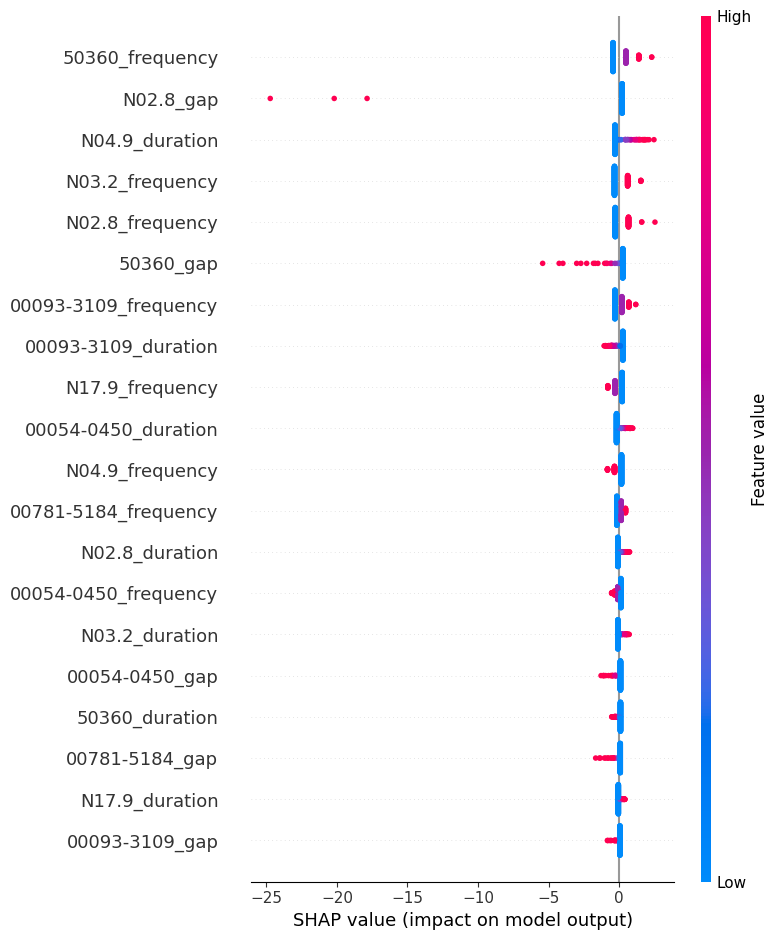

<Figure size 640x480 with 0 Axes>

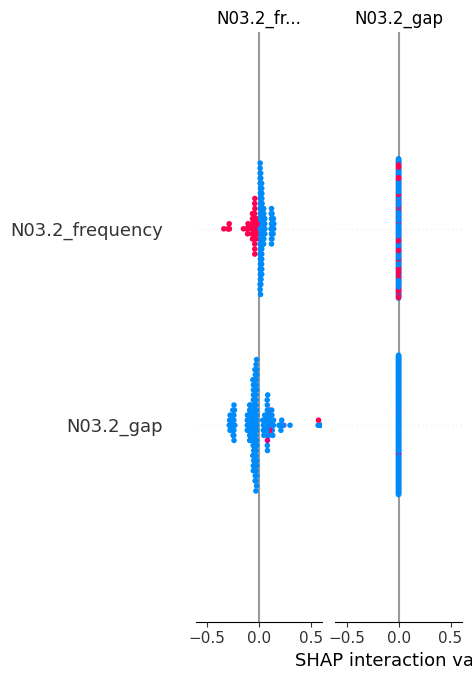

<Figure size 640x480 with 0 Axes>

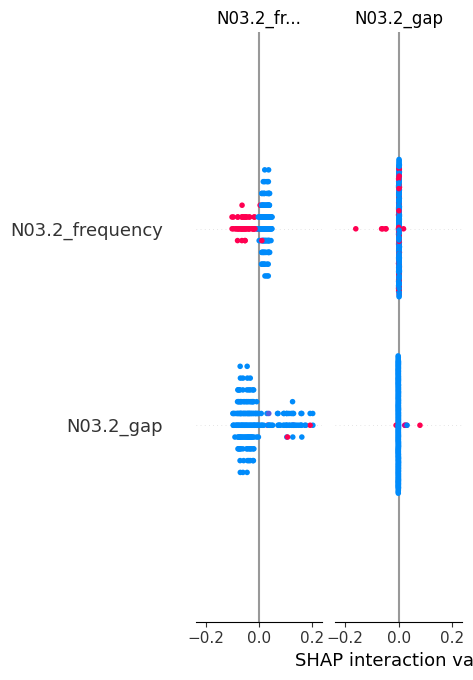

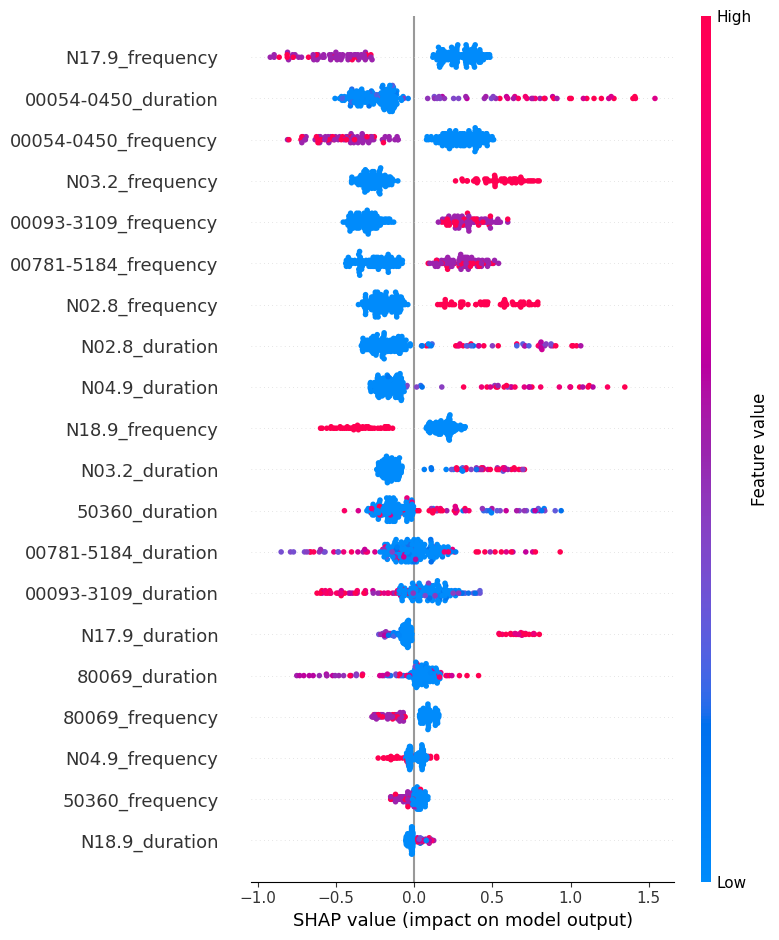

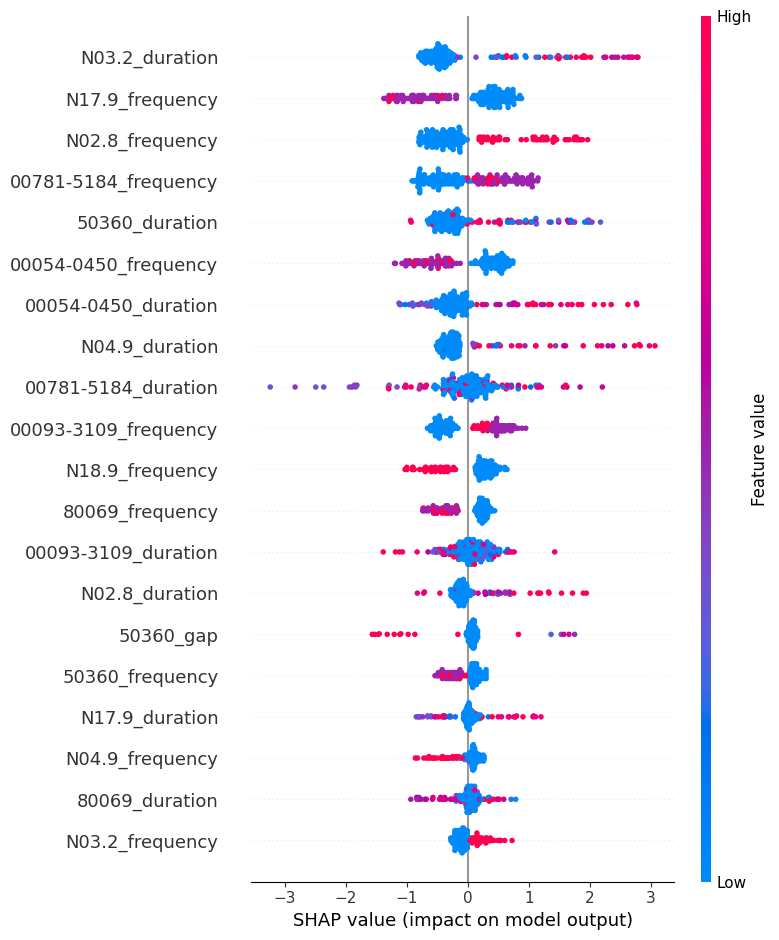

In [29]:
explain_models(models, features)

In [42]:
"""
This is a boilerplate pipeline 'reportingPipeline'
generated using Kedro 1.0.0
"""
#import pandas as pd
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from datetime import datetime
import warnings
import os
from matplotlib import image as mpimg

warnings.filterwarnings('ignore')

def generate_report(code_var_table, baseline_metrics, finetuned_metrics, 
                   important_features_path="patient-finder/data/02_intermediate/important_features.txt",
                   shap_plots_dir="patient-finder/data/02_intermediate/shap_plots",
                   output_path="patient-finder/docs/business_report.pdf", 
                   company_name="Chryselys Services Private Limited",
                   report_title="Patient Finder Model Performance Report"):
   
    # Set style for professional look
    plt.style.use('default')
    sns.set_palette("husl")
    
    # --- Load Data ---
    code_var_table = code_var_table.sort_values(by="variance", ascending=False)
    
    with open(important_features_path, "r") as f:
        important_feats = [line.strip() for line in f.readlines()]
    
    
    # Create PDF
    with PdfPages(output_path) as pdf:
        
        # === PAGE 1: TITLE PAGE ===
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')
        
        gradient = np.linspace(0, 1, 256).reshape(256, -1)
        ax.imshow(gradient, extent=[0, 10, 0, 8], aspect='auto', cmap='Blues_r', alpha=0.3)
        
        ax.text(5, 6.5, report_title, fontsize=28, weight='bold', 
                ha='center', va='center', color='#1f4e79')
        ax.text(5, 5.2, f"Generated on {datetime.now().strftime('%B %d, %Y')}", 
                fontsize=14, ha='center', va='center', color='#666666')
        ax.text(5, 1, "CONFIDENTIAL - INTERNAL USE ONLY", 
                fontsize=10, ha='center', va='center', 
                style='italic', color='#999999')
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 8)
        plt.tight_layout()
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
        
        # === PAGE 2: FEATURE IMPORTANCE ANALYSIS ===
        fig = plt.figure(figsize=(11, 8.5))
        gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
        
        # Top features bar chart
        ax1 = fig.add_subplot(gs[0, :])
        top_10_features = code_var_table.head(10)
        colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_features)))
        bars = ax1.barh(range(len(top_10_features)), top_10_features['variance'], color=colors)
        ax1.set_yticks(range(len(top_10_features)))
        ax1.set_yticklabels(top_10_features['code'], fontsize=10)
        ax1.set_xlabel('Variance Score', fontsize=12, weight='bold')
        ax1.set_title('Top Features by Variance', fontsize=10, weight='bold', pad=20)
        ax1.grid(axis='x', alpha=0.3)
        
        for i, (bar, value) in enumerate(zip(bars, top_10_features['variance'])):
            ax1.text(bar.get_width() + max(top_10_features['variance']) * 0.01, 
                    bar.get_y() + bar.get_height()/2, f'{value:.4f}', 
                    va='center', fontsize=9, weight='bold')
        
        # Feature overlap analysis
        ax2 = fig.add_subplot(gs[1, 0])
        intersect_features = [f for f in important_feats if f in code_var_table["code"].values]
        overlap_data = [len(intersect_features), len(important_feats) - len(intersect_features)]
        labels = ['In Analysis', 'Not in Analysis']
        colors_pie = ['#2E8B57', '#CD5C5C']
        
        ax2.pie(overlap_data, labels=labels, autopct='%1.1f%%',
                                          colors=colors_pie, startangle=90)
        ax2.set_title('Business-Important Features\nOverlap Analysis', 
                     fontsize=12, weight='bold')
        
        # Feature statistics
        ax3 = fig.add_subplot(gs[1, 1])
        ax3.axis('off')
        stats_text = f"""
FEATURE STATISTICS

Total Features Analyzed: {len(code_var_table)}
Business-Important Features: {len(important_feats)}
Overlap Count: {len(intersect_features)}
Overlap Percentage: {len(intersect_features)/len(important_feats)*100:.1f}%

Top 5 Business Features in Analysis:
"""
        for i, feat in enumerate(intersect_features[:5]):
            stats_text += f"{i+1}. {feat}\n"
        
        ax3.text(0.1, 0.9, stats_text, fontsize=11, va='top', ha='left',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.7))
        
        plt.suptitle('FEATURE IMPORTANCE ANALYSIS', fontsize=15, weight='bold', y=0.95)
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
        
        # === PAGE 3: MODEL PERFORMANCE COMPARISON ===
        fig = plt.figure(figsize=(11, 8.5))
        gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)
        
        models = list(baseline_metrics.keys())
        metrics_types = ['accuracy', 'f1', 'roc_auc']
        
        baseline_data = []
        finetuned_data = []
        
        for model in models:
            baseline_data.append([baseline_metrics[model][metric] for metric in metrics_types])
            finetuned_data.append([finetuned_metrics.get(model, {}).get(metric, 0) 
                                 for metric in metrics_types])
        
        baseline_df = pd.DataFrame(baseline_data, columns=metrics_types, index=models)
        finetuned_df = pd.DataFrame(finetuned_data, columns=metrics_types, index=models)
        
        # Bar chart comparison
        ax1 = fig.add_subplot(gs[0, :])
        x = np.arange(len(models))
        width = 0.25
        
        for i, metric in enumerate(metrics_types):
            ax1.bar(x + i*width, baseline_df[metric], width, 
                   label=f'Baseline {metric.upper()}', alpha=0.8)
            ax1.bar(x + i*width, finetuned_df[metric] - baseline_df[metric], width,
                   bottom=baseline_df[metric], label=f'Fine-tuned {metric.upper()}', alpha=0.8)
        
        ax1.set_xlabel('Models', fontsize=12, weight='bold')
        ax1.set_ylabel('Score', fontsize=12, weight='bold')
        ax1.set_title('Model Performance: Baseline vs Fine-tuned', fontsize=14, weight='bold')
        ax1.set_xticks(x + width)
        ax1.set_xticklabels([m.capitalize() for m in models])
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(axis='y', alpha=0.3)
        
        # Heatmap
        ax2 = fig.add_subplot(gs[1, 0])
        improvement_matrix = finetuned_df - baseline_df
        sns.heatmap(improvement_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
                   center=0, ax=ax2, cbar_kws={'label': 'Improvement Score'})
        ax2.set_title('Performance Improvement Heatmap', fontsize=12, weight='bold')
        
        # Best model summary
        ax3 = fig.add_subplot(gs[1, 1])
        ax3.axis('off')
        
        best_model = max(finetuned_metrics.items(), key=lambda x: x[1]["accuracy"])[0]
        best_metrics = finetuned_metrics[best_model]
        
        summary_text = f"""
BEST PERFORMING MODEL

Model: {best_model.upper()}

Performance Metrics:
• Accuracy: {best_metrics['accuracy']:.3f}
• F1 Score: {best_metrics['f1']:.3f}  
• AUC Score: {best_metrics['roc_auc']:.3f}

Improvements over Baseline:
• Accuracy: +{best_metrics['accuracy'] - baseline_metrics[best_model]['accuracy']:.3f}
• F1 Score: +{best_metrics['f1'] - baseline_metrics[best_model]['f1']:.3f}
• AUC Score: +{best_metrics['roc_auc'] - baseline_metrics[best_model]['roc_auc']:.3f}
        """
        
        ax3.text(0.1, 0.9, summary_text, fontsize=11, va='top', ha='left',
                bbox=dict(boxstyle="round,pad=0.4", facecolor='lightgreen', alpha=0.7))
        
        plt.suptitle('MODEL PERFORMANCE COMPARISON', fontsize=20, weight='bold', y=0.95)
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
        
        # === PAGE 4: SHAP FEATURE EXPLANATIONS ===
        if shap_plots_dir and os.path.exists(shap_plots_dir):
            shap_pngs = [
                "shap_bar_decision_tree.png",
                "shap_bar_lightgbm.png",
                "shap_bar_logistic_regression.png",
                "shap_bar_random_forest.png",
                "shap_bar_xgboost.png",
                "shap_summary_decision_tree.png",
                "shap_summary_lightgbm.png",
                "shap_summary_logistic_regression.png",
                "shap_summary_random_forest.png",
                "shap_summary_xgboost.png",
                "shap_dependence_lightgbm.png",
                "shap_dependence_logistic_regression.png",
                "shap_dependence_xgboost.png"
            ]

            for shap_file in shap_pngs:
                shap_path = os.path.join(shap_plots_dir, shap_file)
                if os.path.exists(shap_path):
                    fig, ax = plt.subplots(figsize=(11, 8.5))
                    img = mpimg.imread(shap_path)
                    ax.imshow(img)
                    ax.axis('off')
                    ax.set_title(f"SHAP Explanation: {shap_file.replace('_',' ').replace('.png','').title()}",
                                 fontsize=14, weight='bold')
                    pdf.savefig(fig, bbox_inches='tight')
                    plt.close()
        
        # === FINAL PAGE: RECOMMENDATIONS & CONCLUSIONS ===
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')
        
        avg_improvement = np.mean([finetuned_metrics[m]['accuracy'] - baseline_metrics[m]['accuracy'] 
                                 for m in models])
        best_feature = code_var_table.iloc[0]['code']
        
        ax.text(0.05, 0.9, "RECOMMENDATIONS & CONCLUSIONS", fontsize=16, weight='bold', color='#1f4e79')
        ax.text(0.05, 0.75, f"• On average, fine-tuning improved accuracy by {avg_improvement:.3f}.", fontsize=12)
        ax.text(0.05, 0.65, f"• Feature '{best_feature}' showed the highest variance importance.", fontsize=12)
        ax.text(0.05, 0.55, "• SHAP analysis highlights key drivers of model predictions,\n"
                             "   supporting interpretability and business decision-making.", fontsize=12)
        ax.text(0.05, 0.45, "• Recommended next steps: validate top features with domain experts\n"
                             "   and assess fairness across patient subgroups.", fontsize=12)
        
        ax.text(0.5, 0.02, f"Report generated by {company_name} Data Science Team | {datetime.now().strftime('%Y-%m-%d')}",
                fontsize=9, ha='center', va='bottom', style='italic', color='#666666')
        
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
    
    print(f"PDF report generated: {output_path}")
    output = {"path": output_path, "report_generated": True}
    
    return output


In [43]:
code_var_table = pd.read_csv("patient-finder/data/02_intermediate/code_variance.csv")
import json
baseline_metrics = json.load(open("patient-finder/data/02_intermediate/metrics.json"))  
finetuned_metrics = json.load(open("patient-finder/data/02_intermediate/finetuning_metrics.json"))  

In [44]:
generate_report(code_var_table, baseline_metrics, finetuned_metrics)

PDF report generated: patient-finder/docs/business_report.pdf


{'path': 'patient-finder/docs/business_report.pdf', 'report_generated': True}